In [36]:
import numpy as np
from numpy import array

# Convolutional Neural Network Models for Time Series Forecasting

This notebook is based on the blog of Jason Brownlee, see [here](https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/) for more infos and details on the use of a convolutional neural network for time series forecasting.

## Univariate CNN Models

Although traditionally developed for two-dimensional image data, CNNs can be used to model univariate time series forecasting problems.

Univariate time series are datasets comprised of a single series of observations with a temporal ordering and a model is required to learn from the series of past observations to predict the next value in the sequence.

This section is divided into two parts; they are:

- Data Preparation
- CNN Model

### Data Preparation

Before a univariate series can be modeled, it must be prepared.

The CNN model will learn a function that maps a sequence of past observations as input to an output observation. As such, the sequence of observations must be transformed into multiple examples from which the model can learn.

Consider a given univariate sequence:

In [11]:
print(list(range(10,100,10)))

[10, 20, 30, 40, 50, 60, 70, 80, 90]


We can divide the sequence into multiple input/output patterns called samples, where three time steps are used as input and one time step is used as output for the one-step prediction that is being learned.

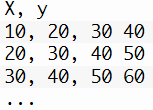

The `split_sequence()` function below implements this behavior and will split a given univariate sequence into multiple samples where each sample has a specified number of time steps and the output is a single time step.

In [12]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [14]:
# define input sequence
raw_seq = list(range(10,100,10))
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


### CNN Model

In [15]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [16]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[101.65114]]


### Exercise - Train a CNN Network to Forecast a Fibonacci Number

In [19]:
def fibonacci_1(n):
    if n <= 1:
        return n
    else:
        return fibonacci_1(n-1) + fibonacci_1(n-2)

In [20]:
def fibonacci_2(n):
    # Initialize the list with the first two numbers
    fib = [0, 1]
    
    # Calculate the rest of the numbers using a loop
    for i in range(2, n):
        # Add the previous two numbers to get the next number
        next_fib = fib[i-1] + fib[i-2]
        fib.append(next_fib)
    
    # Return the list of Fibonacci numbers
    return fib[:n]

In [33]:
n = 15
raw_seq = fibonacci_2(n)
print(raw_seq)
print(fibonacci_1(n))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]
610


In [34]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [35]:
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array(raw_seq[-n_steps:])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[610.1629]]


## Credit and Reference 

- J. Brownlee, "[How to Develop Convolutional Neural Network Models for Time Series Forecasting](https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/)", Machine Learning Mastery, November 12, 2018.